In [30]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import math

In [31]:
def dividing_line(x):
    y = 2*x+2
    return y

In [32]:
def generate_dataset(function, N):
    x = torch.linspace(-math.pi, math.pi, N)
    y = torch.sin(x)

    return torch.stack((x,y),-1)

In [33]:
def plot_dataset(data):
    plt.scatter(data[:,0],data[:,1])
    plt.title("Dataset")

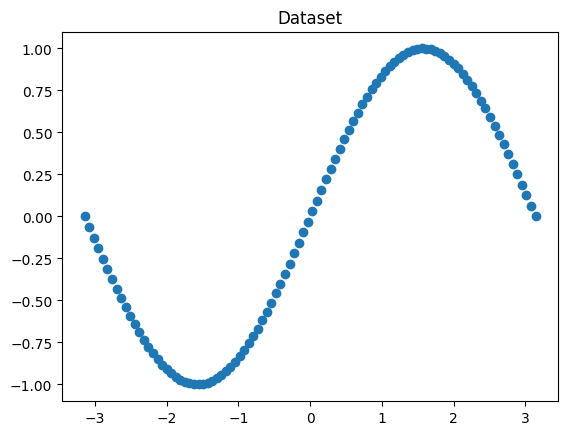

In [34]:
data = generate_dataset(dividing_line ,100)
plot_dataset(data)

In [53]:
model = torch.nn.Sequential(
    torch.nn.Linear(1,2),
    torch.nn.Flatten(0,1)
                   )

In [54]:
x = data[:,0].unsqueeze(-1)
y = data[:,1].flatten()

In [55]:
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6
for t in range(200):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    #if t % 100 == 99:
        #print(t, loss.item())
    print(t, loss.item())
        
    model.zero_grad()
    
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
        

/Users/ryan/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (200) must match the size of tensor b (100) at non-singleton dimension 0

In [ ]:
def nn_dataset(model, N):
    x = torch.linspace(-math.pi, math.pi, N)
    x = x.unsqueeze(-1)
    with torch.no_grad():
        y = model(x)
    return x,y

In [ ]:
x_val, y_val = nn_dataset(model, 100)
plt.scatter(x_val, y_val)